<a href="https://colab.research.google.com/github/Redoxfox/Tarea3AD_UNAD/blob/main/RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Modelo de regresión lineal***


**¿Qué es un modelo de regresión lineal?**

La regresión lineal es uno de los modelos más simples y usados en machine learning para predecir un valor numérico (como un precio, salario, puntuación, etc.).

**¿Cómo funciona?**

La idea principal es encontrar una relación lineal entre una variable dependiente (en este caso, el precio de venta del carro) y varias variables independientes (como año, precio original, tipo de combustible, kms recorridos, etc.).

Matemáticamente, se parece a esta fórmula:

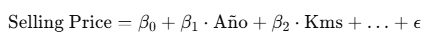


β son los coeficientes que el modelo aprende.

ε es el error (la diferencia entre lo real y lo predicho).

**¿Por qué se usa?**



*   Es rápido de entrenar y fácil de interpretar.
*   Útil como modelo base para comparar con otros más complejos.
*   Funciona bien cuando las relaciones entre variables son aproximadamente    lineales.









**1. Análisis exploratorio de datos (EDA)**

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Librerías de Scikit-Learn para entrenamiento y evaluación de modelos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar el archivo CSV con los datos del carro
CarDetails = pd.read_csv('/content/car data.csv')

# Mostrar las primeras filas del DataFrame
display(CarDetails.head())

# Mostrar información general de las columnas y tipos de datos
CarDetails.info()

# Mostrar estadísticas generales como media, mediana, etc.
display(CarDetails.describe())

# Verificar valores nulos en el DataFrame
print("Valores nulos por columna:")
print(CarDetails.isnull().sum())

# Ver cuántos registros tienen 'Owner' igual a cero
print("Cantidad de Registros con cero Owner:",CarDetails['Owner'].isin([0]).sum())



,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Valores nulos por columna:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64
Cantidad de Registros con cero Owner: 290


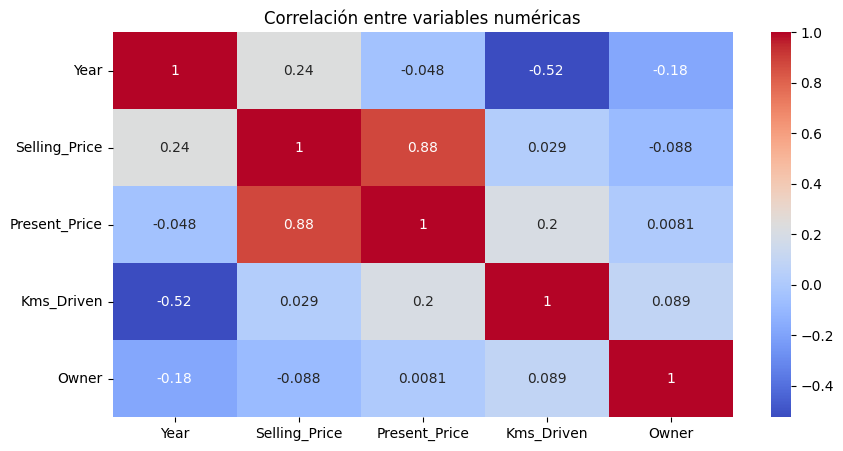

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(CarDetails.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas')
plt.show()

**2. Procesamiento**

In [ ]:
# Ver valores únicos por columna
for col in CarDetails.columns:
    print(f"{col}: {CarDetails[col].unique()}\n")

# Convertir variables categóricas a variables dummies
df_encoded = pd.get_dummies(CarDetails, drop_first=True)

df_encoded.head()

Car_Name: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'H

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,2013,4.75,9.54,43000,0,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,2017,7.25,9.85,6900,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2011,2.85,4.15,5200,0,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,2014,4.60,6.87,42450,0,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


**3. Selección de caracteristicas y split de datos**

In [ ]:
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**4. Entrenamiento**

In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

**5.Evaluación**

In [ ]:
y_pred = modelo.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 2.0063617884631113
RMSE: 2.9460064359561065
R2 Score: 0.684106500142745


**6. Visualización**

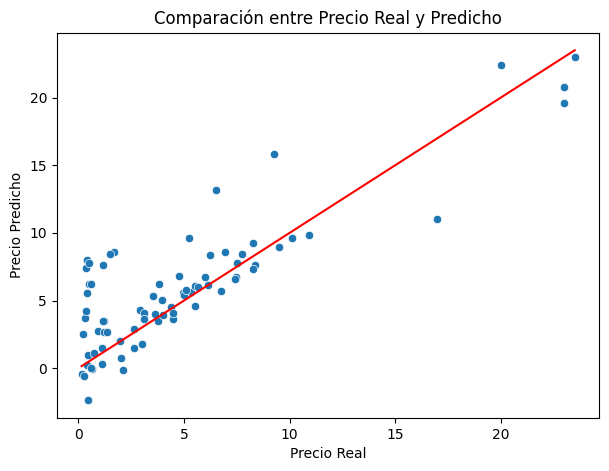

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Comparación entre Precio Real y Predicho")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Línea ideal
plt.show()

**8. Interpretación**

**Resultados**



*   **MAE**	- 2.01:	El error promedio en las predicciones es de 2 unidades monetarias. No está mal, pero podría ser mejor.

*   **RMSE**	- 2.95:	Indica que hay algunos errores más grandes. Penaliza más los errores extremos.

*  **R² Score**	- 0.684:	El modelo explica el 68.4% de la variación del precio. Es un resultado moderadamente bueno, pero no excelente.

**¿Qué nos dicen estos resultados?**

El modelo logra capturar una parte importante de la lógica de precios, pero falla en algunos casos, posiblemente porque:

* Algunas relaciones no son lineales (por ejemplo, el precio no baja proporcionalmente con los kilómetros).

* Puede haber interacciones entre variables (ejemplo: un carro diésel usado puede tener un comportamiento distinto que uno a gasolina).

* Variables como Car_Name no están incluidas directamente y pueden influir.

* Hay pocos datos o mucha variabilidad en el comportamiento de ciertos tipos de autos.

**¿Qué podríamos hacer para mejorar?**

* Crear una variable de antigüedad: 2025 - Year, en lugar de usar el año directamente.

* Probar modelos más potentes como Random Forest, Gradient Boosting o XGBoost, que pueden capturar relaciones no lineales y combinaciones entre variables.

* Normalizar variables como Kms_Driven si tienen una escala muy distinta.

* Agregar más datos, si es posible, o eliminar outliers que distorsionen el modelo.


